## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

In [78]:
# Nothing to do here

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [80]:
# Import modules
import pandas as pd

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [82]:
# How many distinct colors are available?
num_colors = colors.name.nunique()
print(num_colors)

135


## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [84]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans').count()
print(colors_summary)


           id  name  rgb
is_trans                
f         107   107  107
t          28    28   28


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

year
1950     10.14
1953     16.50
1954     12.36
1955     36.86
1956     18.50
1957     42.62
1958     44.45
1959     16.25
1960    175.33
1961     70.59
1962     81.75
1963     33.33
1964     82.64
1965    107.10
1966     40.65
1967     98.67
1968    127.20
1969     64.59
1970     84.79
1971     67.02
1972    102.84
1973    103.37
1974    116.77
1975    155.23
1976    153.03
1977     91.50
1978    146.62
1979    105.41
1980    126.64
1981     97.84
         ...  
1988    144.25
1989    102.06
1990    202.04
1991    166.42
1992    119.62
1993    148.43
1994    127.64
1995    179.04
1996    201.77
1997    129.22
1998    141.13
1999    105.54
2000    104.38
2001    104.37
2002    115.70
2003    159.68
2004    138.86
2005    198.75
2006    246.90
2007    229.03
2008    231.64
2009    196.90
2010    210.65
2011    160.45
2012    149.81
2013    181.36
2014    169.32
2015    200.22
2016    248.95
2017    300.12
Name: num_parts, dtype: float64


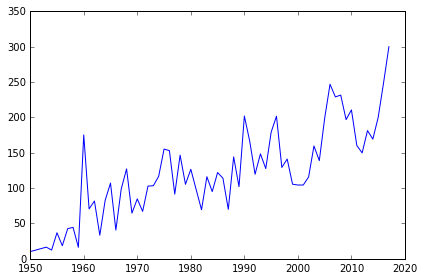

In [86]:
%matplotlib inline

import matplotlib.pyplot as plt

# Read sets data as `sets`
sets = pd.read_csv('datasets/sets.csv')

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets.groupby('year')['num_parts'].mean().round(2)
print(parts_by_year)
# Plot trends in average number of parts by year
plt.plot(parts_by_year)

## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [88]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets[['year', 'theme_id']].groupby('year', as_index = False).agg({"theme_id": pd.Series.nunique})

print(themes_by_year)

    year  theme_id
0   1950         2
1   1953         1
2   1954         2
3   1955         4
4   1956         3
5   1957         4
6   1958         3
7   1959         3
8   1960         3
9   1961         6
10  1962         4
11  1963         7
12  1964         7
13  1965         6
14  1966         9
15  1967        11
16  1968        11
17  1969        10
18  1970        15
19  1971        12
20  1972        12
21  1973        16
22  1974        14
23  1975        13
24  1976        22
25  1977        19
26  1978        23
27  1979        18
28  1980        27
29  1981        25
..   ...       ...
36  1988        36
37  1989        33
38  1990        33
39  1991        39
40  1992        40
41  1993        39
42  1994        43
43  1995        47
44  1996        50
45  1997        54
46  1998        75
47  1999        71
48  2000        56
49  2001        64
50  2002        75
51  2003        80
52  2004        72
53  2005        65
54  2006        74
55  2007        78
56  2008    

## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>

In [90]:
# Nothing to do here